<a href="https://colab.research.google.com/github/jil18/Project1/blob/main/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI for socialmedia Analysis and Insights**

In [ ]:


from google.colab import files
uploaded = files.upload()





Saving social_media_posts.csv.ipynb to social_media_posts.csv.ipynb


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the uploaded file
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Clean null values if any
df = df.dropna(subset=['text'])

# Sentiment function
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to dataset
df['Sentiment'] = df['text'].apply(get_sentiment)
df.head()


,text,Sentiment
0,"I love this product, it's amazing!",Positive
1,This update ruined everything.,Neutral
2,"It's fine, nothing special.",Positive


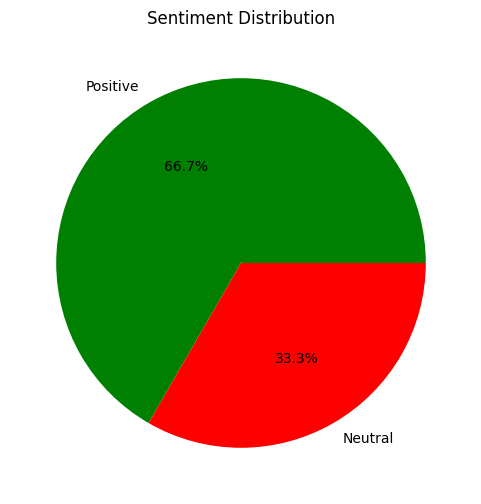

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()

colors = ['green', 'red', 'gray']
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Sentiment Distribution")
plt.show()


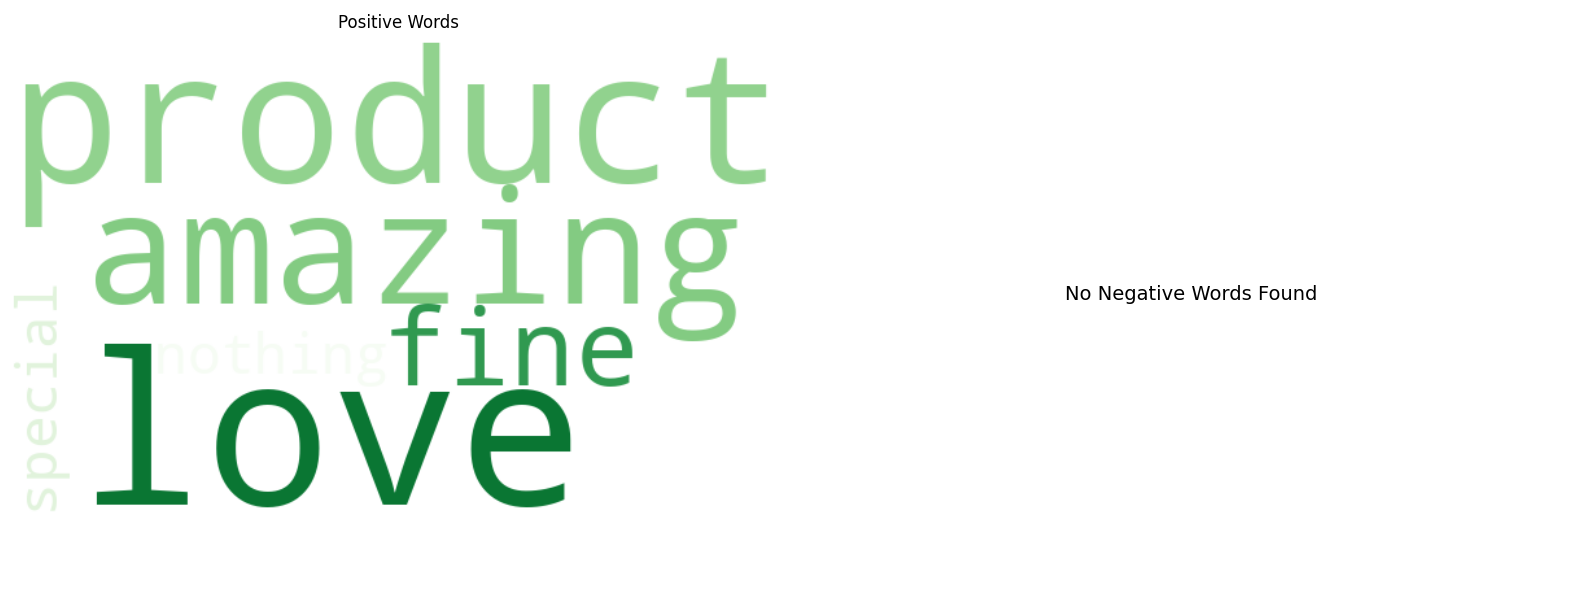

In [ ]:
from wordcloud import WordCloud

# Separate text
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['text'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['text'])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Positive Word Cloud
if positive_text.strip():
    wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
    ax[0].imshow(wordcloud_pos, interpolation='bilinear')
    ax[0].set_title("Positive Words")
else:
    ax[0].text(0.5, 0.5, 'No Positive Words Found', horizontalalignment='center', verticalalignment='center', fontsize=14)
ax[0].axis('off')

# Negative Word Cloud
if negative_text.strip():
    wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
    ax[1].imshow(wordcloud_neg, interpolation='bilinear')
    ax[1].set_title("Negative Words")
else:
    ax[1].text(0.5, 0.5, 'No Negative Words Found', horizontalalignment='center', verticalalignment='center', fontsize=14)
ax[1].axis('off')

plt.tight_layout()
plt.show()
